In [3]:
#------------------------------------------------------------------
#IMPOTACION DE LIBRERIAS PARA EL DESARROLLO DE LA ACTIVIDAD 
#------------------------------------------------------------------


import pandas as pd #cumple con la funcion de manipular y analizar datos:cargar/mostrar/eliminar nulos

import numpy as np #cumple con la funcion de trabajar listas y operaciones matematcas como el calculo de metricas de error

import matplotlib.pyplot as plt #representa los datos de manera grafica 

import seaborn as sns #mejora la apariencia de los graficos ,de manera mas detallada y estilizada 


#libreria de maching learning
from sklearn.model_selection import train_test_split #divide los datos entre los conjuntos de entrenamiento y prueba

from sklearn.preprocessing import OneHotEncoder, StandardScaler
#'OneHotEncoder'el primer parametro convierte en categorias (marca ,modelo)en numero 
#'StandardScaler'el segundo prarametro normaliza los datos para mejorar la precision del modelo

from sklearn.ensemble import RandomForestRegressor#modelo basado en arboles de desicion,se usa para predecir valores numericos 'regresion'

from sklearn.metrics import mean_absolute_error,mean_squared_error
#calculo de errores y sus raices cuadradas /mide su desviacion/pealiza errores/


from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
#------------------------------------------------------------------
#ANALISIS EXPLORATORIO DE DATOS 
#------------------------------------------------------------------


#cargar archivos,esto se hace con la libreria pandas'pd'
dt = pd.read_csv(r"heart_cleveland_upload.csv")

#cambio del nombre de las variables a español
dt.rename(columns={
    'age': 'Edad',
    'sex': 'Sexo',
    'cp': 'Tipo_Dolor_Pecho',
    'trestbps': 'Presion_Arterial_Reposo',
    'chol': 'Colesterol',
    'fbs': 'Azucar_En_Ayunas',
    'restecg': 'Electrocardiograma_Reposo',
    'thalach': 'Frecuencia_Cardiaca_Maxima',
    'exang': 'Angina_Inducida_Ejercicio',
    'oldpeak': 'Depresion_ST',
    'slope': 'Pendiente_ST',
    'ca': 'Vasos_Sanguineos_Colorantes',
    'thal': 'Talasemia',
    'target': 'Enfermedad_Cardiaca'
}, inplace=True)

dt.head()


,Edad,Sexo,Tipo_Dolor_Pecho,Presion_Arterial_Reposo,Colesterol,Azucar_En_Ayunas,Electrocardiograma_Reposo,Frecuencia_Cardiaca_Maxima,Angina_Inducida_Ejercicio,Depresion_ST,Pendiente_ST,Vasos_Sanguineos_Colorantes,Talasemia,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
#visualiacion de columnas y datatype
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Edad                         297 non-null    int64  
 1   Sexo                         297 non-null    int64  
 2   Tipo_Dolor_Pecho             297 non-null    int64  
 3   Presion_Arterial_Reposo      297 non-null    int64  
 4   Colesterol                   297 non-null    int64  
 5   Azucar_En_Ayunas             297 non-null    int64  
 6   Electrocardiograma_Reposo    297 non-null    int64  
 7   Frecuencia_Cardiaca_Maxima   297 non-null    int64  
 8   Angina_Inducida_Ejercicio    297 non-null    int64  
 9   Depresion_ST                 297 non-null    float64
 10  Pendiente_ST                 297 non-null    int64  
 11  Vasos_Sanguineos_Colorantes  297 non-null    int64  
 12  Talasemia                    297 non-null    int64  
 13  condition           

In [6]:
#estadisticas del dataset
dt.describe()

,Edad,Sexo,Tipo_Dolor_Pecho,Presion_Arterial_Reposo,Colesterol,Azucar_En_Ayunas,Electrocardiograma_Reposo,Frecuencia_Cardiaca_Maxima,Angina_Inducida_Ejercicio,Depresion_ST,Pendiente_ST,Vasos_Sanguineos_Colorantes,Talasemia,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [7]:
dt.isnull().sum()

Edad                           0
Sexo                           0
Tipo_Dolor_Pecho               0
Presion_Arterial_Reposo        0
Colesterol                     0
Azucar_En_Ayunas               0
Electrocardiograma_Reposo      0
Frecuencia_Cardiaca_Maxima     0
Angina_Inducida_Ejercicio      0
Depresion_ST                   0
Pendiente_ST                   0
Vasos_Sanguineos_Colorantes    0
Talasemia                      0
condition                      0
dtype: int64

In [8]:
dt.duplicated().sum()

0

In [9]:
#------------------------------------------------------------------
#OUTLIERS / VALORES ATÍPICOS
#------------------------------------------------------------------

Q1 = dt['Colesterol'].quantile(0.25)
Q3 = dt['Colesterol'].quantile(0.75)

IQR = Q3 - Q1

outliers = dt[(dt['Colesterol'] < Q1 - 1.5 * IQR) | (dt['Colesterol'] > Q3 + 1.5 * IQR)]

print(outliers[['Sexo', 'Colesterol']])

     Sexo  Colesterol
79      0         564
83      0         417
180     0         407
188     0         394
238     0         409


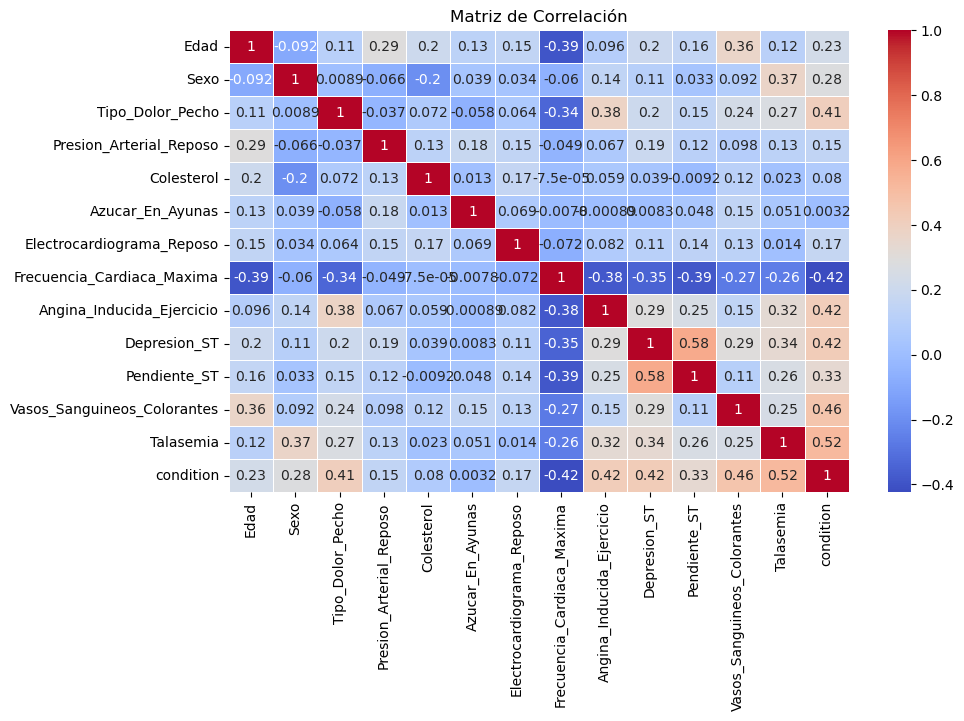

In [10]:
#------------------------------------------
#Correlación: sns.heatmap(), sns.pairplot()
#------------------------------------------

# Matriz de correlación
correlation_matrix = dt.corr(numeric_only=True)

# Mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [11]:
# Matriz de Correlación - Análisis de variables relevantes respecto a 'condition' (enfermedad cardíaca)

# Frecuencia_Cardiaca_Maxima tiene una correlación negativa fuerte con condition (-0.42).
# Esto indica que las personas con mayor frecuencia cardíaca máxima tienden a NO tener enfermedades cardíacas.

# Angina_Inducida_Ejercicio tiene una correlación positiva moderada con condition (0.43).
# Las personas que experimentan angina inducida por ejercicio tienen más probabilidad de tener enfermedad cardíaca.

# Depresion_ST y Pendiente_ST también muestran correlaciones positivas (0.42 y 0.33 respectivamente).
# Estos factores están relacionados con el estado del ST después del ejercicio, importante en cardiología.

# Vasos_Sanguineos_Colorantes (0.46) y Talasemia (0.52) tienen correlaciones positivas significativas con condition.
# Esto indica que estas características son más frecuentes en pacientes con enfermedad cardíaca.

# Edad y Sexo tienen correlaciones bajas pero positivas con la condición.
# Aunque no son los predictores más fuertes por sí solos, pueden complementar otros factores.

# Variables como Colesterol, Azucar_En_Ayunas y Electrocardiograma_Reposo tienen baja o nula correlación.
# Podrían no aportar información significativa para modelos predictivos, aunque deben evaluarse en conjunto.

# Recomendación: considerar usar las variables con correlaciones más fuertes como parte del modelo predictivo.


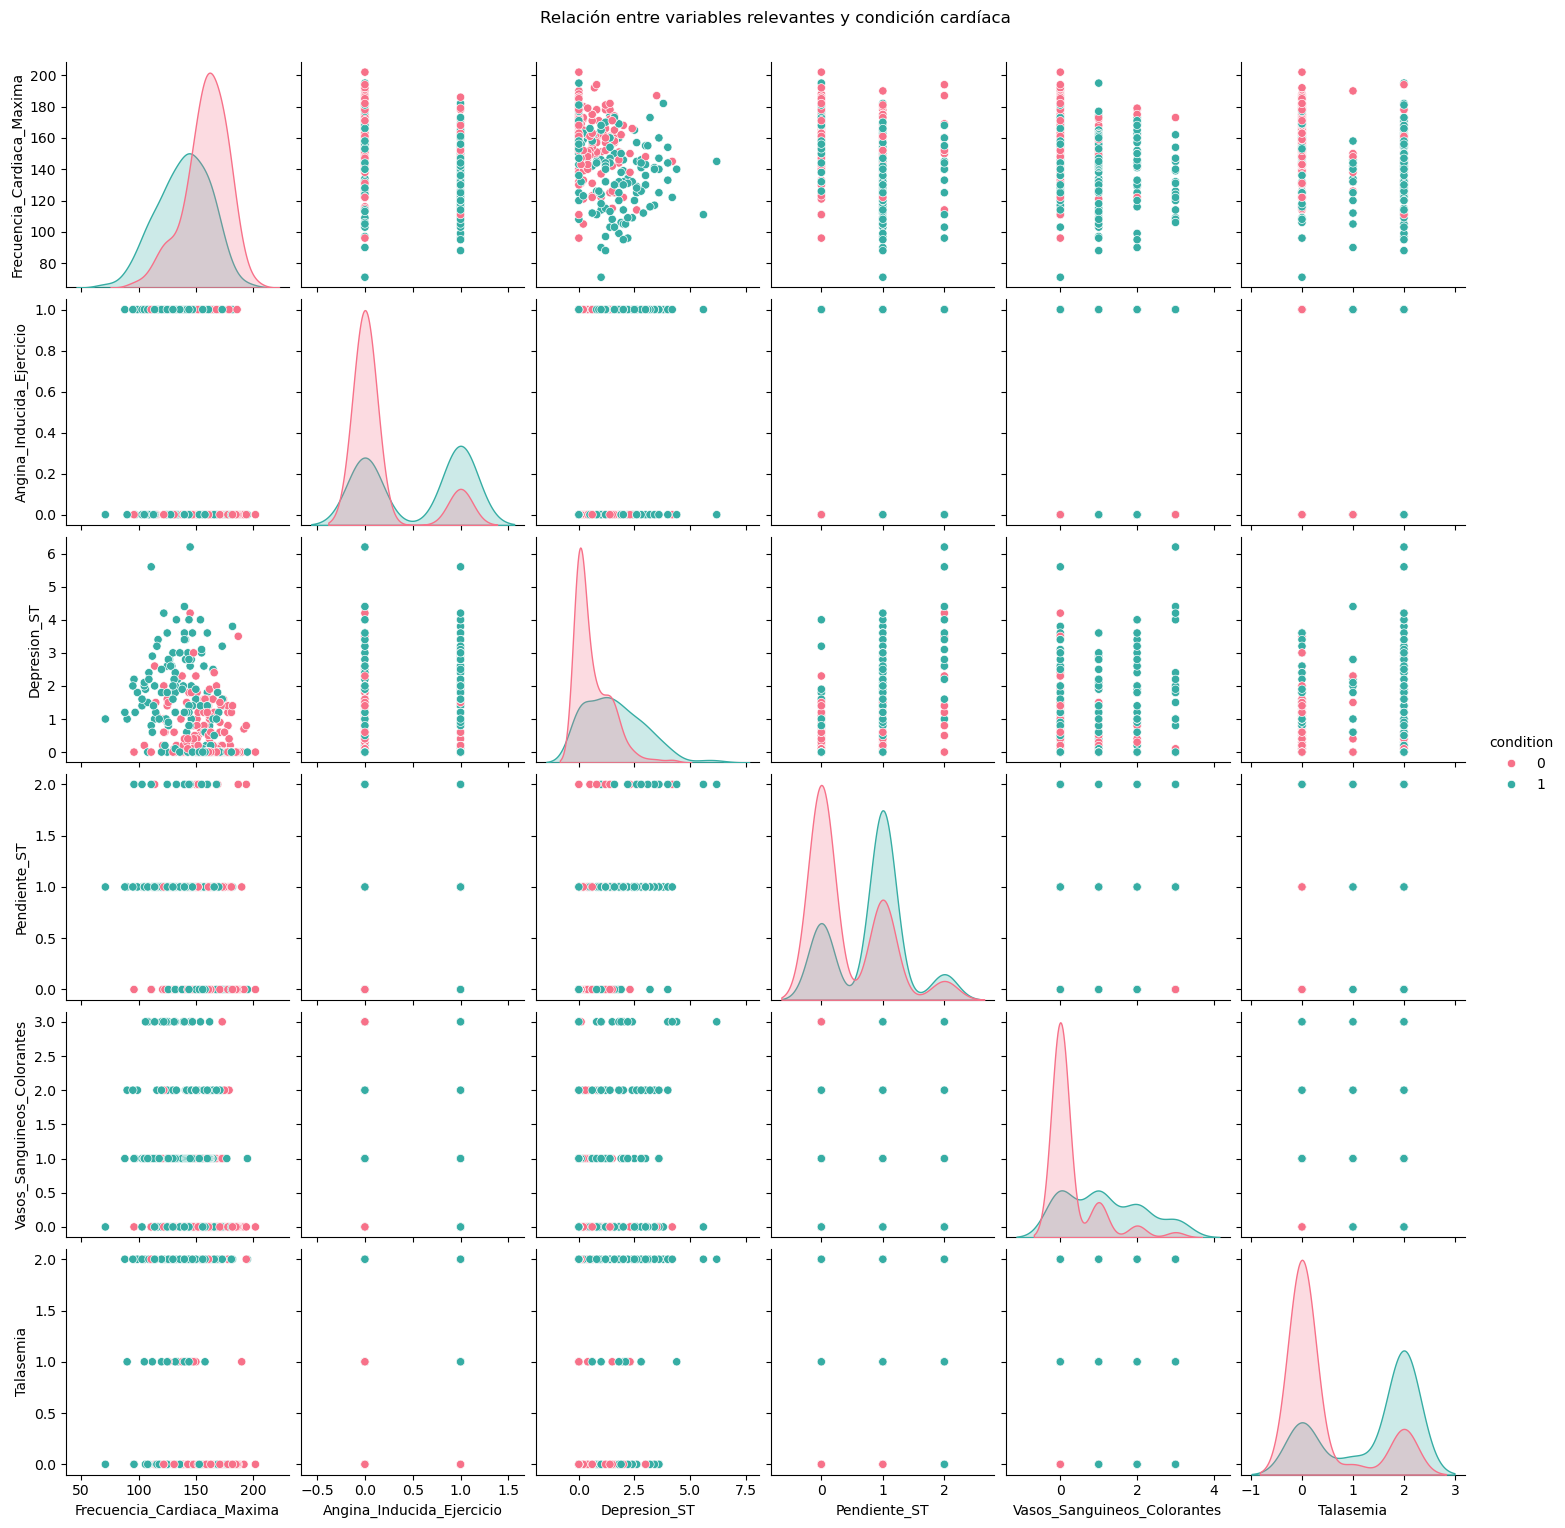

In [12]:
sns.pairplot(dt, 
             vars=['Frecuencia_Cardiaca_Maxima', 'Angina_Inducida_Ejercicio', 
                   'Depresion_ST', 'Pendiente_ST', 'Vasos_Sanguineos_Colorantes', 
                   'Talasemia'], 
             hue='condition', 
             palette='husl')  

plt.suptitle('Relación entre variables relevantes y condición cardíaca', y=1.02)
plt.show()

In [13]:
# Frecuencia_Cardiaca_Maxima:
# Se observa una clara diferencia en la distribución entre pacientes con y sin condición cardíaca.
# Las personas con enfermedad (en color diferente) tienden a tener una frecuencia cardíaca máxima menor.
# Esta variable tiene una fuerte correlación negativa con la condición y podría ser un predictor importante.

# Angina_Inducida_Ejercicio:
# Variable categórica (0 o 1), donde se nota que el grupo con condición cardíaca tiene mayor proporción de valores en 1.
# Es decir, la presencia de angina inducida por el ejercicio es más común en pacientes enfermos.

# Depresion_ST:
# Hay una ligera tendencia a mayores valores de depresión del segmento ST en personas con condición cardíaca.
# Aunque la superposición de puntos es alta, los valores extremos tienden a concentrarse más en el grupo enfermo.

# Pendiente_ST:
# Esta variable categórica muestra una buena diferenciación entre grupos.
# Las personas sin enfermedad tienen más frecuencias en pendiente tipo 1, mientras que en los otros tipos aumenta la proporción de enfermos.

# Vasos_Sanguineos_Colorantes:
# Aunque hay muchos valores repetidos (0, 1, 2, 3), se nota que a mayor cantidad de vasos coloreados, menor probabilidad de enfermedad.
# El grupo enfermo se concentra en los valores más bajos (principalmente 0), lo que la hace útil como predictor.

# Talasemia:
# También categórica, muestra una separación importante entre clases, especialmente en el valor 3 (donde hay más sanos).
# Por tanto, es una variable relevante al clasificar la condición cardíaca.

# General:
# Las variables seleccionadas muestran patrones que permiten diferenciar los grupos.
# Se recomienda continuar con su uso en modelos predictivos, ya que combinan variables numéricas y categóricas que aportan información valiosa.


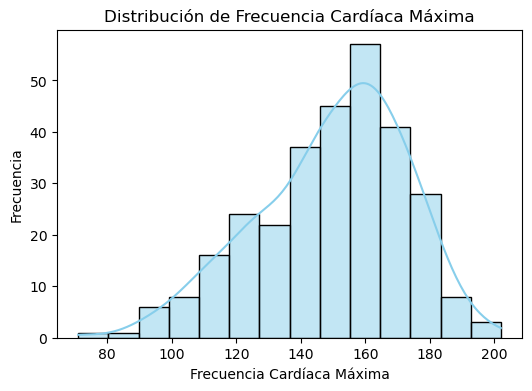

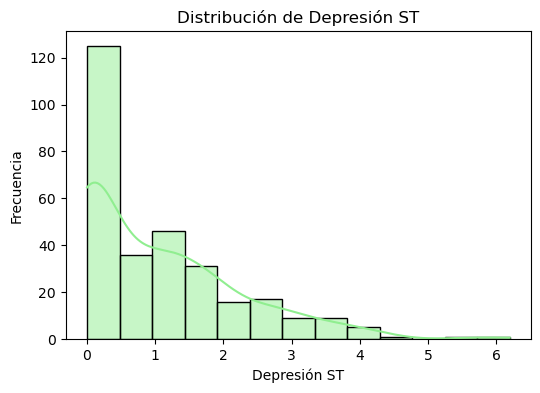

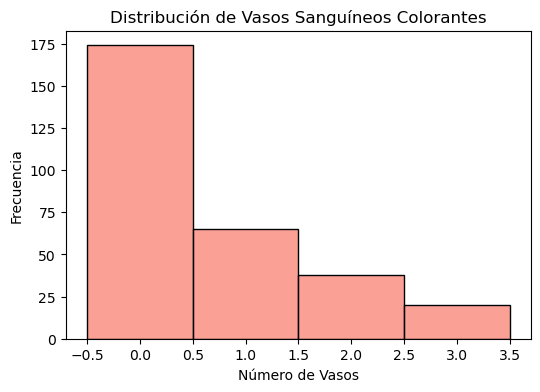

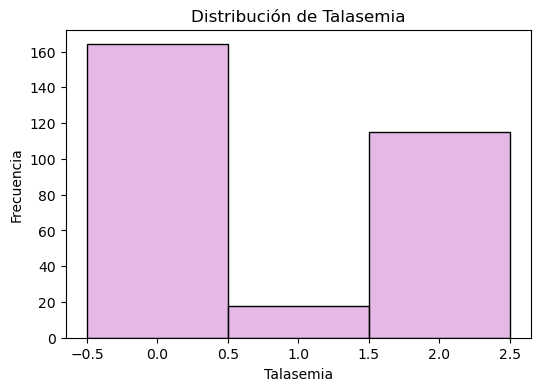

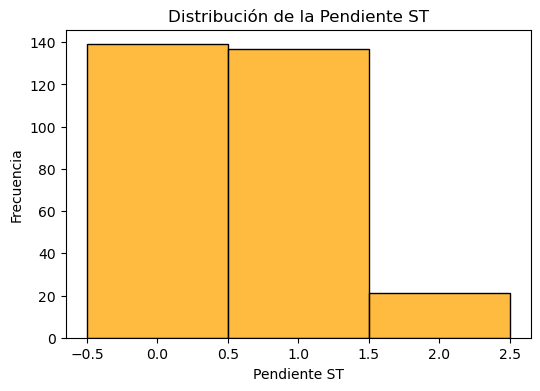

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Frecuencia_Cardiaca_Maxima
# Representa la frecuencia máxima del corazón alcanzada durante una prueba de esfuerzo.
plt.figure(figsize=(6,4))
sns.histplot(dt['Frecuencia_Cardiaca_Maxima'], kde=True, color='skyblue')
plt.title('Distribución de Frecuencia Cardíaca Máxima')
plt.xlabel('Frecuencia Cardíaca Máxima')
plt.ylabel('Frecuencia')
plt.show()

# 2. Depresion_ST
# Muestra cuánta depresión del segmento ST se observó después del ejercicio.
plt.figure(figsize=(6,4))
sns.histplot(dt['Depresion_ST'], kde=True, color='lightgreen')
plt.title('Distribución de Depresión ST')
plt.xlabel('Depresión ST')
plt.ylabel('Frecuencia')
plt.show()

# 3. Vasos_Sanguineos_Colorantes
# Número de vasos sanguíneos principales vistos con medio de contraste. Variable discreta.
plt.figure(figsize=(6,4))
sns.histplot(dt['Vasos_Sanguineos_Colorantes'], kde=False, discrete=True, color='salmon')
plt.title('Distribución de Vasos Sanguíneos Colorantes')
plt.xlabel('Número de Vasos')
plt.ylabel('Frecuencia')
plt.show()

# 4. Talasemia
# Tipo de talasemia del paciente. Valores discretos que representan distintas categorías.
plt.figure(figsize=(6,4))
sns.histplot(dt['Talasemia'], kde=False, discrete=True, color='plum')
plt.title('Distribución de Talasemia')
plt.xlabel('Talasemia')
plt.ylabel('Frecuencia')
plt.show()

# 5. Pendiente_ST
# Pendiente del segmento ST del ECG tras el ejercicio. Se interpreta como descendente, plana o ascendente.
plt.figure(figsize=(6,4))
sns.histplot(dt['Pendiente_ST'], kde=False, discrete=True, color='orange')
plt.title('Distribución de la Pendiente ST')
plt.xlabel('Pendiente ST')
plt.ylabel('Frecuencia')
plt.show()



In [22]:
# Análisis de la distribución de Frecuencia_Cardiaca_Maxima
# La mayoría de los pacientes presenta una frecuencia cardíaca máxima entre 130 y 170 latidos por minuto.
# Esto sugiere que el rango cardiaco alcanzado durante el esfuerzo es moderado-alto, con pocos valores extremos.
# La distribución es aproximadamente normal con ligera asimetría negativa, lo que puede indicar un ligero sesgo hacia valores más altos.

# Análisis de la distribución de Depresion_ST
# La mayor parte de los pacientes tiene niveles bajos de depresión del segmento ST.
# La distribución está altamente sesgada hacia la izquierda (asimetría positiva), lo cual es típico,
# ya que valores altos de depresión ST no son tan comunes y podrían estar asociados a mayor riesgo cardíaco.

# Análisis de la distribución de Vasos_Sanguineos_Colorantes
# La mayoría de los pacientes no tiene vasos sanguíneos colorantes (valor 0).
# A medida que aumenta el número de vasos detectados, la frecuencia disminuye significativamente.
# Esto indica que es raro observar más de un vaso con medio de contraste, lo cual puede tener valor diagnóstico importante.

# Análisis de la distribución de Talasemia
# Se observan dos categorías predominantes en esta variable, con un número muy reducido de pacientes en la clase intermedia.
# Esto puede deberse a que las formas severas o leves de talasemia son más fácilmente identificables o más comunes en esta muestra.

# Análisis de la distribución de Pendiente_ST
# La mayoría de los pacientes presenta una pendiente ST plana o descendente.
# Esto es clínicamente relevante, ya que una pendiente descendente suele asociarse con isquemia inducida por ejercicio.
# Solo una pequeña parte de los pacientes muestra pendiente ascendente, que usualmente se considera normal.


In [23]:
X = dt.drop('condition', axis=1)  # Eliminar la columna 'condition' para las características
y = dt['condition'] 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Estandarizar las características (es importante para regresión logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Inicializar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

In [29]:
# Entrenar el modelo
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [30]:
# Hacer predicciones
y_pred = model.predict(X_test_scaled)

In [31]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [32]:
# Mostrar los resultados
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.79
Confusion Matrix:
[[37 11]
 [ 8 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80        48
           1       0.76      0.81      0.78        42

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90

